 BHARAT INTERNSHIP

 ** DOG VS CAT Classifier**

Problem statement :

To predict whether the uploaded image is represents a dog or cat using classification techniques

Link to the dataset : https://www.kaggle.com/competitions/dogs-vs-cats/data

Installing kaggle in ColabResearch

In [ ]:
pip install kaggle

In [ ]:
#Configuring the path of Kaggle.json filehttps://www.interviewbit.com/
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing the Dog  vs Cat dataset from kaggle


In [ ]:
#Kaggle api
!kaggle competitions download -c dogs-vs-cats

 97% 790M/812M [00:08<00:00, 231MB/s]
100% 812M/812M [00:08<00:00, 103MB/s]


In [ ]:
from zipfile import ZipFile
dataset = '/content/dogs-vs-cats.zip'
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
from zipfile import ZipFile
dataset = '/content/train.zip'
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
import os
#counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


Printing the name of images

In [ ]:
file_names =  os.listdir('/content/train/')
print(file_names)

['cat.8868.jpg', 'dog.11655.jpg', 'dog.7181.jpg', 'dog.3609.jpg', 'cat.8018.jpg', 'cat.8015.jpg', 'dog.2969.jpg', 'cat.11524.jpg', 'dog.8084.jpg', 'dog.1790.jpg', 'dog.7516.jpg', 'cat.5740.jpg', 'cat.12059.jpg', 'dog.86.jpg', 'dog.7143.jpg', 'dog.1366.jpg', 'cat.260.jpg', 'dog.7021.jpg', 'cat.2562.jpg', 'cat.7495.jpg', 'dog.5948.jpg', 'dog.10939.jpg', 'dog.6425.jpg', 'cat.4320.jpg', 'cat.12338.jpg', 'dog.3850.jpg', 'cat.9299.jpg', 'cat.10335.jpg', 'dog.6998.jpg', 'dog.3338.jpg', 'cat.3877.jpg', 'dog.5497.jpg', 'dog.8856.jpg', 'cat.8775.jpg', 'dog.9079.jpg', 'dog.3755.jpg', 'dog.4407.jpg', 'dog.9395.jpg', 'cat.4832.jpg', 'dog.3586.jpg', 'dog.5220.jpg', 'dog.2334.jpg', 'cat.9586.jpg', 'cat.10279.jpg', 'cat.2110.jpg', 'cat.10532.jpg', 'dog.4543.jpg', 'dog.11883.jpg', 'dog.8602.jpg', 'cat.4655.jpg', 'cat.66.jpg', 'cat.8355.jpg', 'dog.11507.jpg', 'cat.3166.jpg', 'cat.7530.jpg', 'cat.101.jpg', 'dog.8152.jpg', 'cat.10003.jpg', 'cat.3841.jpg', 'dog.2813.jpg', 'cat.12378.jpg', 'cat.2076.jpg', '

Importing the Dependencies

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Displaying the images of dogs and cats

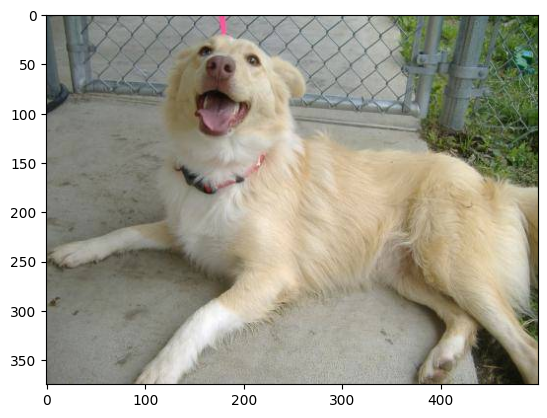

In [ ]:
#display dog image
img = mpimg.imread('/content/train/dog.3609.jpg')
imgplt = plt.imshow(img)
plt.show()

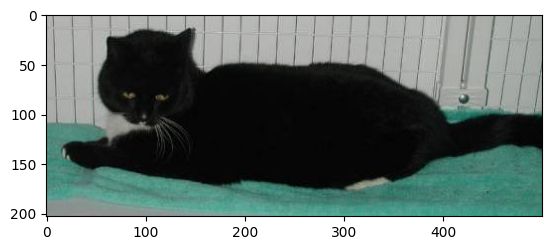

In [ ]:
#display cat image
img = mpimg.imread('/content/train/cat.8868.jpg')
imgplt = plt.imshow(img)
plt.show()

In [ ]:
file_names = os.listdir('/content/train/')
for i in range(5):
  name = file_names[i]
  print(name[0:3])

cat
dog
dog
dog
cat


In [ ]:
file_names = os.listdir('/content/train/')
dog_count = 0
cat_count = 0
for img_file in file_names:
  name = img_file[0:3]
  if name == 'dog':
    dog_count += 1
  else:
    cat_count +=1
print('Number of dog images = ', dog_count)
print('Number of cat images = ', cat_count)

Number of dog images =  12500
Number of cat images =  12500


Resizing the images

In [ ]:
#creating a directory for resized images
os.mkdir('/content/image resized')

In [ ]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'
for i in range(2000):
  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename
  img = Image.open(img_path)
  img = img.resize((224,224))
  img = img.convert('RGB')
  newImgPath = resized_folder+filename
  img.save(newImgPath)

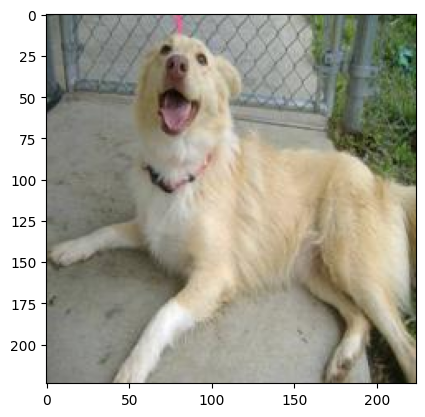

In [ ]:
#display resized dog image
img = mpimg.imread('/content/image resized/dog.3609.jpg')
imgplt = plt.imshow(img)
plt.show()

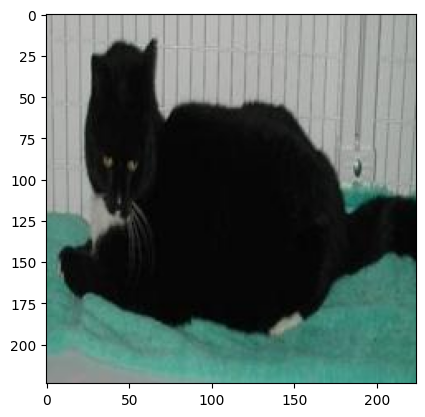

In [ ]:
#display resized cat image
img = mpimg.imread('/content/image resized/cat.8868.jpg')
imgplt = plt.imshow(img)
plt.show()

Creating labels for resized images of dogs and cats

Cat -> 0

Dog -> 1

---



In [ ]:
#creating a for loop to assign labels
filenames = os.listdir('/content/image resized/')
labels = []

for i in range(2000):
  file_name = filenames[i]
  label = file_name[0:3]
  if label == 'dog':
    labels.append(1)
  else:
    labels.append(0)

In [ ]:
print(filenames[0:5])
print(len(filenames))

['cat.8868.jpg', 'dog.11655.jpg', 'dog.7181.jpg', 'dog.3609.jpg', 'cat.8018.jpg']
2000


In [ ]:
print(labels[0:5])
print(len(labels))

[0, 1, 1, 1, 0]
2000


In [ ]:
#creating the images of dogs and cats out of 2000 images
values, counts =np.unique(labels, return_counts =True)
print(values)
print(counts)

[0 1]
[ 995 1005]


Converting all the resized images to numpy arrays

In [ ]:
import cv2
import glob

In [ ]:
image_directory = '/content/image resized/'
image_extension = ['png' , 'jpg']
files = []
[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]
dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [ ]:
print(dog_cat_images)

[[[[181 183 183]
   [176 178 178]
   [165 167 167]
   ...
   [169 173 168]
   [161 165 160]
   [165 169 164]]

  [[181 183 183]
   [176 178 178]
   [166 168 168]
   ...
   [169 173 168]
   [161 165 160]
   [166 170 165]]

  [[180 182 182]
   [177 179 179]
   [166 168 168]
   ...
   [169 173 168]
   [161 165 160]
   [166 170 165]]

  ...

  [[145 146 142]
   [145 146 142]
   [145 146 142]
   ...
   [124 143  56]
   [122 141  56]
   [123 142  55]]

  [[146 147 145]
   [146 147 145]
   [146 147 145]
   ...
   [123 143  54]
   [122 141  54]
   [125 145  56]]

  [[146 147 145]
   [146 147 145]
   [146 147 145]
   ...
   [122 142  53]
   [123 143  54]
   [126 146  57]]]


 [[[191 195 213]
   [198 202 220]
   [197 204 221]
   ...
   [158 173 189]
   [195 210 226]
   [168 183 199]]

  [[177 181 199]
   [192 196 214]
   [179 186 203]
   ...
   [183 198 214]
   [171 186 202]
   [136 151 167]]

  [[169 175 194]
   [164 170 189]
   [123 129 148]
   ...
   [173 188 204]
   [164 179 195]
   [146 161

In [ ]:
type(dog_cat_images)

numpy.ndarray

In [ ]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [ ]:
X = dog_cat_images
Y = np.asarray(labels)

Train test split

In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y, test_size=0.2 , random_state = 2)

In [ ]:
print(X.shape, X_train.shape ,X_test.shape )

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600 --> training images

400 --> test images

In [ ]:
#scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
print(X_train_scaled)

[[[[0.00392157 0.01568627 0.03529412]
   [0.         0.01176471 0.03137255]
   [0.         0.01176471 0.03137255]
   ...
   [0.03921569 0.02745098 0.03529412]
   [0.         0.         0.01176471]
   [0.01176471 0.00784314 0.02352941]]

  [[0.00784314 0.01960784 0.03921569]
   [0.00784314 0.01960784 0.03921569]
   [0.00392157 0.01568627 0.03529412]
   ...
   [0.04313725 0.03137255 0.03921569]
   [0.         0.         0.01176471]
   [0.01568627 0.01176471 0.02745098]]

  [[0.01568627 0.02745098 0.04705882]
   [0.01568627 0.02745098 0.04705882]
   [0.01960784 0.03137255 0.05098039]
   ...
   [0.03921569 0.02745098 0.03529412]
   [0.00392157 0.         0.01568627]
   [0.01568627 0.01176471 0.02745098]]

  ...

  [[0.25098039 0.20392157 0.13333333]
   [0.26666667 0.21960784 0.14901961]
   [0.28627451 0.23921569 0.16862745]
   ...
   [0.47058824 0.4745098  0.57647059]
   [0.4745098  0.47058824 0.57254902]
   [0.47058824 0.47058824 0.56470588]]

  [[0.34117647 0.29411765 0.22352941]
   [0.2

Building the Neural network

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub


In [ ]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape = (224,224,3), trainable=False)

In [ ]:
num_of_classes = 2
model = tf.keras.Sequential([
   pretrained_model,
   tf.keras.layers.Dense(num_of_classes)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
model.compile(

          optimizer = 'adam',
          loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
          metrics = ['acc']
)

In [ ]:
model.fit(X_train_scaled, Y_train, epochs=5 )

Epoch 1/5
50/50 [==============================] - 52s 967ms/step - loss: 0.1910 - acc: 0.9262
Epoch 2/5
50/50 [==============================] - 70s 1s/step - loss: 0.0703 - acc: 0.9781
Epoch 3/5
50/50 [==============================] - 72s 1s/step - loss: 0.0517 - acc: 0.9881
Epoch 4/5
50/50 [==============================] - 59s 1s/step - loss: 0.0408 - acc: 0.9900
Epoch 5/5
50/50 [==============================] - 71s 1s/step - loss: 0.0334 - acc: 0.9919


In [ ]:
score, acc = model.evaluate(X_test_scaled , Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 13s 968ms/step - loss: 0.0505 - acc: 0.9850
Test Loss = 0.05049484595656395
Test Accuracy = 0.9850000143051147


Predictive System

Path of the image to be predicted: /content/dog.jpg


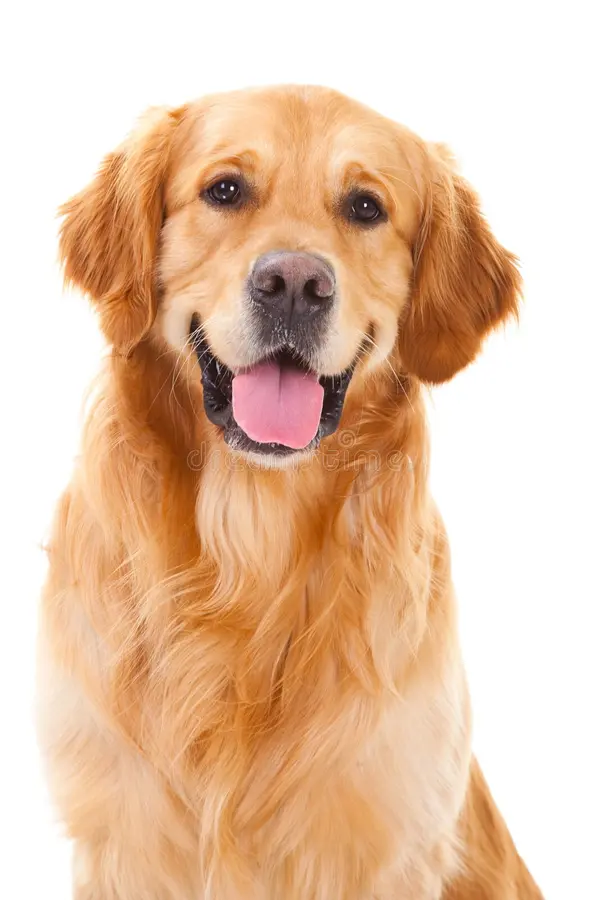

1/1 [==============================] - 0s 82ms/step
[[-3.3318179  3.0144205]]
1
The image represents a Dog


In [ ]:
input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255
image_reshaped = np.reshape(input_image_scaled, [1,224, 224,3])
input_prediction = model.predict(image_reshaped)
print(input_prediction)
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)
if input_pred_label == 0 :
  print('The image represents a Cat')
else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/cat.jpg


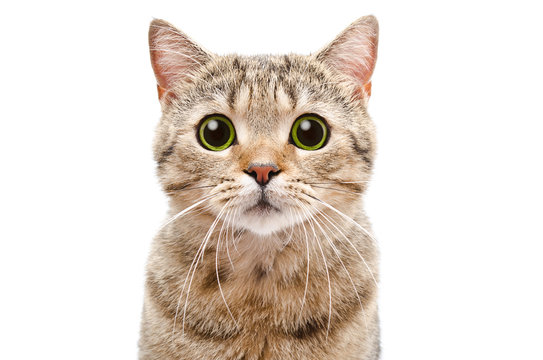

1/1 [==============================] - 0s 52ms/step
[[ 3.2469852 -2.6003876]]
0
The image represents a Cat


In [ ]:
input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255
image_reshaped = np.reshape(input_image_scaled, [1,224, 224,3])
input_prediction = model.predict(image_reshaped)
print(input_prediction)
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)
if input_pred_label == 0 :
  print('The image represents a Cat')
else:
  print('The image represents a Dog')